# Обучение модели для выявления коров с вкусным молоком и большим надоем
К нам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он хочет отобрать коров так, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже.

Поэтому он просит нас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. 
«ЭкоФерма» готова предоставить подробные данные о своих коровах.
Нам предстоит создать две прогнозные модели для отбора бурёнок в поголовье:
* Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
* Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:
* средний удой за год — не менее 6000 килограммов; 
* молоко должно быть вкусным.

## Шаг 1. Загрузка данных
Взглянем на каждый датасет в отдельности.

### Датасет  ferma_main.csv

Для этого выведем на экран информацию о каждым датасете и его часть. Посчитаем кол-во пропусков.

In [1]:
!pip install phik

     |████████████████████████████████| 686 kB 1.2 MB/s eta 0:00:01


In [2]:
from scipy import stats as st
import numpy as np
import pandas as pd 
from pandas import DataFrame
import random
import numpy
from matplotlib import pyplot 
import seaborn as sns
from sklearn.linear_model import (
    LogisticRegression,
    LinearRegression 
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    confusion_matrix, 
    r2_score,
    precision_score,
    recall_score
)
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler
)
import seaborn as sns
import math
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.pyplot as plt
import phik
from scipy import stats as st

In [3]:
main_total = pd.read_csv('/datasets/ferma_main.csv', sep = ';', decimal = ',')
column_names = main_total.columns.tolist()
for a in column_names:
    print('колличество пропусков в столбце -',a)
    print(main_total[a].isna().sum())
    print('---------------')
print(main_total.info())
main_total

колличество пропусков в столбце - id
0
---------------
колличество пропусков в столбце - Удой, кг
0
---------------
колличество пропусков в столбце - ЭКЕ (Энергетическая кормовая единица)
0
---------------
колличество пропусков в столбце - Сырой протеин, г
0
---------------
колличество пропусков в столбце - СПО (Сахаро-протеиновое соотношение)
0
---------------
колличество пропусков в столбце - Порода
0
---------------
колличество пропусков в столбце - Тип пастбища
0
---------------
колличество пропусков в столбце - порода папы_быка
0
---------------
колличество пропусков в столбце - Жирность,%
0
---------------
колличество пропусков в столбце - Белок,%
0
---------------
колличество пропусков в столбце - Вкус молока
0
---------------
колличество пропусков в столбце - Возраст
0
---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------            

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
629,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


Всего в датасете 12 столбцов, которые соответсвуют всем признакам. Пропусков в датасете нет.

### Датасет ferma_dad.csv

In [4]:
names_dad = pd.read_csv('/datasets/ferma_dad.csv', sep = ';', decimal = ',')
column_names_dad = names_dad.columns.tolist()
for a in column_names_dad:
    print('колличество пропусков в столбце -',a)
    print(names_dad[a].isna().sum()) 
    print('---------------')
print(names_dad.info())
names_dad

колличество пропусков в столбце - id
0
---------------
колличество пропусков в столбце - Имя Папы
0
---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
None


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
...,...,...
624,625,Буйный
625,626,Барин
626,627,Барин
627,628,Барин


В этой таблице нет пропусков.

### Датасет cow_buy.csv

In [5]:
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep = ';', decimal = ',')
column_names_cow_buy = cow_buy.columns.tolist()
for a in column_names_cow_buy:
    print('колличество пропусков в столбце -',a)
    print(cow_buy[a].isna().sum()) 
    print('---------------')
print(cow_buy.info())
cow_buy

колличество пропусков в столбце - Порода
0
---------------
колличество пропусков в столбце - Тип пастбища
0
---------------
колличество пропусков в столбце - порода папы_быка
0
---------------
колличество пропусков в столбце - Имя_папы
0
---------------
колличество пропусков в столбце - Текущая_жирность,%
0
---------------
колличество пропусков в столбце - Текущий_уровень_белок,%
0
---------------
колличество пропусков в столбце - Возраст
0
---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


Пропусков в этом датасете нет.

Во всех датафреймах нет пропусков и все столбцы соответствуют признакам.

## Шаг 2  Предобработка данных

### Датасет  ferma_main.csv

Нужно проверить столбец id на наличие дублибликатов, ведь только в остальных столбцах они допустимы.

In [6]:
main_total['id'].duplicated().sum()

5

Всего 5 дубликатов, их можно удалить без угрозы ухудшения данных.

In [7]:
main_total = main_total.drop_duplicates()

Также я бы привёл названия столбцов к нижнему регистру

In [8]:
#.str.lower()
lower = main_total.columns.tolist()
main_total.columns = list(map(lambda x: x.lower(), lower))
main_total

,id,"удой, кг",эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,0.940,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет
625,626,5513,12.9,1700,0.880,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет
626,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
627,628,5746,13.8,1994,0.890,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет


In [9]:
main_total

,id,"удой, кг",эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,0.940,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет
625,626,5513,12.9,1700,0.880,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет
626,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
627,628,5746,13.8,1994,0.890,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет


Столбцы переименованы

## Шаг 3 Исследовательский анализ данных
Пришло время провести исследовательский анализ всех признаков, для это я воспользуюсь визуализацией при помощи графиков, также нужно проверить данные на выбросы и если это необходимо то улучшить их.

Text(0, 0.5, 'Удой в кг')

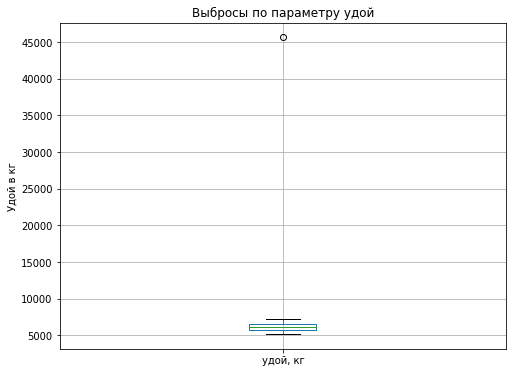

In [10]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
main_total.boxplot(column='удой, кг', ax=ax)
ax.set_title('Выбросы по параметру удой')
ax.set_xlabel('')
ax.set_ylabel('Удой в кг')

Большинство коров даёт в год около 5-6 тысяч литров, а одна даёт аж 45тыс, либо это корова мутант, либо это выброс в данных, на всякий случай я отмету этот выброс.

In [11]:
main_total = main_total.loc[main_total['удой, кг'] < 7000]

In [12]:
main_total.columns

Index(['id', 'удой, кг', 'эке (энергетическая кормовая единица)',
       'сырой протеин, г', 'спо (сахаро-протеиновое соотношение)', 'порода',
       'тип пастбища', 'порода папы_быка', 'жирность,%', 'белок,%',
       'вкус молока', 'возраст'],
      dtype='object')

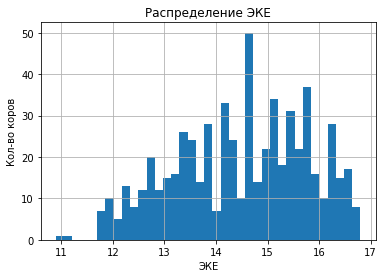

In [13]:
main_total.hist(column='эке (энергетическая кормовая единица)', bins=37)
plt.title('Распределение ЭКЕ')
plt.xlabel('ЭКЕ')
plt.ylabel('Кол-во коров')
plt.show()

Как видно по гистограмме в основном коровы едят корм с эке от 12 до ~17, я бы отбросил данные в которых у коров меньше 12 эке

In [14]:
main_total = main_total.loc[main_total['эке (энергетическая кормовая единица)'] > 11]

Text(0, 0.5, 'сырой протеин г')

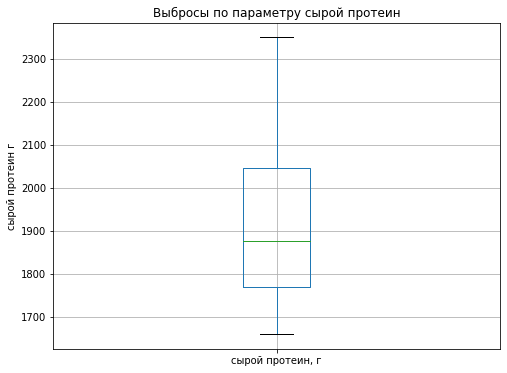

In [15]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
main_total.boxplot(column='сырой протеин, г', ax=ax)
ax.set_title('Выбросы по параметру сырой протеин')
ax.set_ylabel('сырой протеин г')

Как видно на диаграмме размаха, параметр сырой протеин распределён без выбросов.

Text(0, 0.5, 'сырой протеин г')

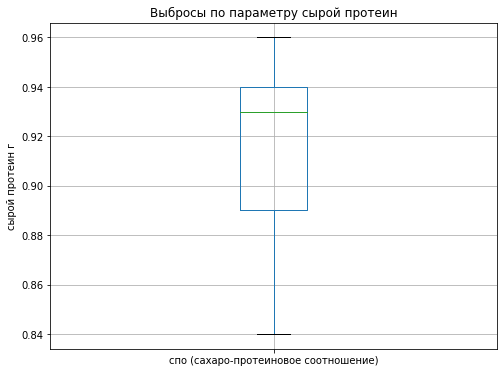

In [16]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
main_total.boxplot(column= 'спо (сахаро-протеиновое соотношение)', ax=ax)
ax.set_title('Выбросы по параметру сырой протеин')
ax.set_ylabel('сырой протеин г')

Text(0, 0.5, 'сырой протеин г')

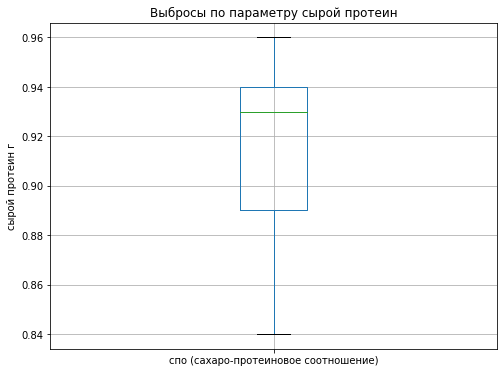

In [17]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
main_total.boxplot(column='спо (сахаро-протеиновое соотношение)', ax=ax)
ax.set_title('Выбросы по параметру сырой протеин')
ax.set_ylabel('сырой протеин г')

Выбросов в параметре сорый протеин нет.

In [18]:
main_total = main_total.loc[main_total['спо (сахаро-протеиновое соотношение)'] > 0.2]

Text(0.5, 1.0, 'Сравнение кол-ва пород')

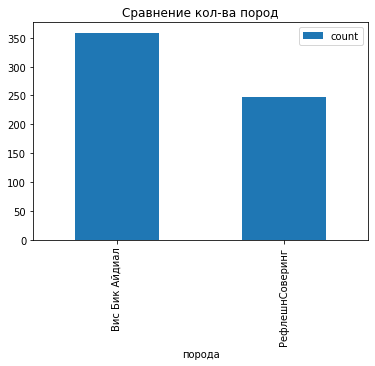

In [19]:
type1 = main_total.pivot_table(index = 'порода' , values = 'возраст', aggfunc = ['count'])
type1.columns = ['count']
type1.plot(kind = 'bar');
plt.title('Сравнение кол-ва пород')

Коров породы Вис Бик Айдиал на 100 больше.

Text(0.5, 1.0, 'Сравнение кол-ва пастбищ')

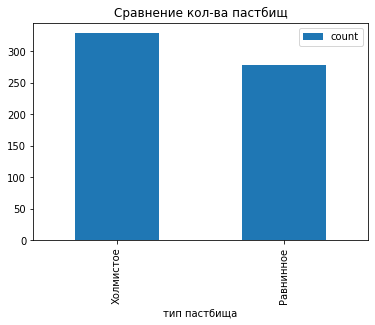

In [20]:
main_total['тип пастбища'] = main_total['тип пастбища'].replace('Равнинные', 'Равнинное')
type2 = main_total.pivot_table(index = 'тип пастбища' , values = 'возраст', aggfunc = ['count'])
type2.columns = ['count']
type2 = type2.sort_values('count',ascending = False)
type2.plot(kind = 'bar');

plt.title('Сравнение кол-ва пастбищ')

Больше всего коров выращено на Холмистом типе пастбищ, чуть меньше на равнинном.

Text(0.5, 1.0, 'Сравнение кол-ва пород быков-отцов')

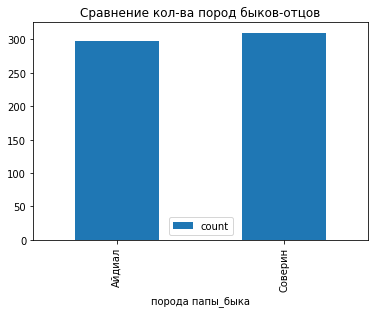

In [21]:
main_total['порода папы_быка'] = main_total['порода папы_быка'].replace('Айдиалл', 'Айдиал')
type3 = main_total.pivot_table(index = 'порода папы_быка' , values = 'возраст', aggfunc = ['count'])
type3.columns = ['count']
type3.plot(kind = 'bar');
plt.title('Сравнение кол-ва пород быков-отцов')

Быков породы Соверин чуть больше.

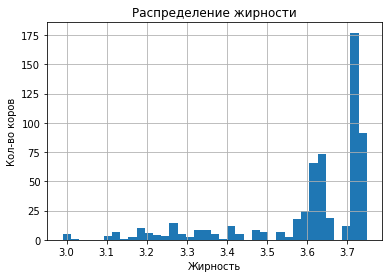

In [22]:
main_total.hist(column='жирность,%', bins=37)
plt.title('Распределение жирности')
plt.xlabel('Жирность')
plt.ylabel('Кол-во коров')
plt.show()

В основном жирность молока - 3.7%

Text(0, 0.5, 'Жирность')

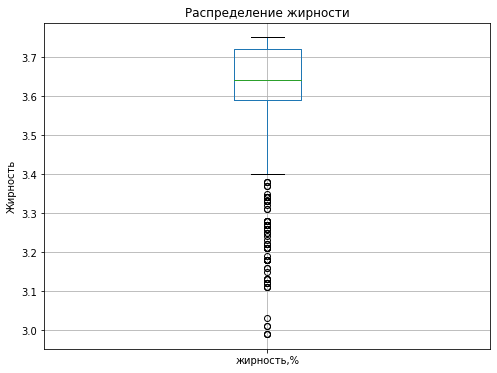

In [23]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
main_total.boxplot(column='жирность,%', ax=ax)
ax.set_title('Распределение жирности')
ax.set_ylabel('Жирность')

Касательно жирности есть большинство позиций находится в районе 3,6-3,8% и небольшое кол-во выбросов с меньшей жирностью.

In [24]:
main_total

,id,"удой, кг",эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,0.940,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет
625,626,5513,12.9,1700,0.880,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет
626,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
627,628,5746,13.8,1994,0.890,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет


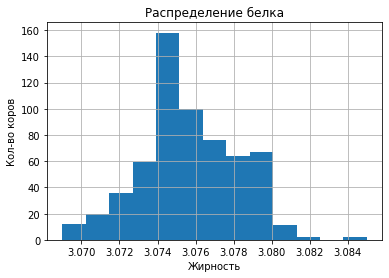

In [25]:
main_total.hist(column='белок,%', bins=13)
plt.title('Распределение белка')
plt.xlabel('Жирность')
plt.ylabel('Кол-во коров')
plt.show()

Text(0, 0.5, 'Жирность')

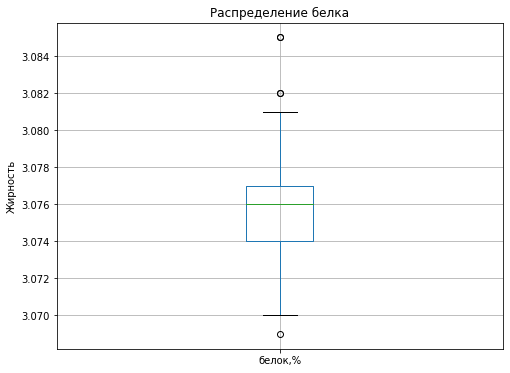

In [26]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
main_total.boxplot(column='белок,%', ax=ax)
ax.set_title('Распределение белка')
ax.set_ylabel('Жирность')

Белок в основном находится в районе 30.76%, значительных выбросов нет.

Text(0.5, 1.0, 'Сравнение кол-ва вкусного и не вкусного молока')

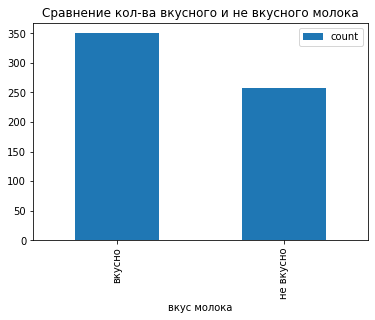

In [27]:
type4 = main_total.pivot_table(index = 'вкус молока' , values = 'возраст', aggfunc = ['count'])
type4.columns = ['count']
type4.plot(kind = 'bar');
plt.title('Сравнение кол-ва вкусного и не вкусного молока')

чуть больше 300 коров с вкусным молоком и около 250 с не вкусным.

Text(0.5, 1.0, 'Сравнение возраста коров')

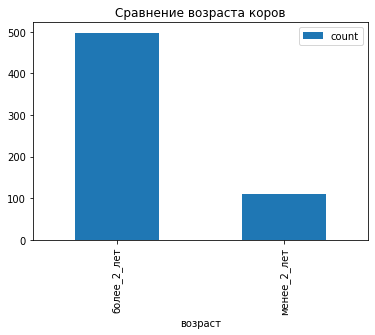

In [28]:
type5 = main_total.pivot_table(index = 'возраст' , values = 'id', aggfunc = ['count'])
type5.columns = ['count']
type5.plot(kind = 'bar');
plt.title('Сравнение возраста коров')

Большая часть скота фермера это коровы старше 2х лет.

Я отсмотрел все параметры и обработал выбросы. Практически все параметры не считая параматра жир распределены близко к нормальному распределению.

## Шаг 4 Корреляционный анализ
Пришло время выявить очевидные зависиммости между параметрами.
Для этого построим гистограммы рассеяния и посчитаем коэф корреляции между колличествеными параметрами.

### Корреляция количественных признаков

In [29]:
main_total.columns = ['id', 'удой_кг', 'эке_(энергетическая_кормовая_единица)',
       'сырой_протеин_г', 'спо_(сахаро-протеиновое_соотношение)', 'порода',
       'тип_пастбища', 'порода_папы_быка', 'жирность%', 'белок%','вкус_молока', 'возраст']

Построим матрицу корреляции.

In [30]:
main_for_matrix = main_total.drop(['id', 'порода',
       'тип_пастбища', 'порода_папы_быка','вкус_молока', 'возраст'],axis = 1)
main_for_matrix.phik_matrix()

interval columns not set, guessing: ['удой_кг', 'эке_(энергетическая_кормовая_единица)', 'сырой_протеин_г', 'спо_(сахаро-протеиновое_соотношение)', 'жирность%', 'белок%']


,удой_кг,эке_(энергетическая_кормовая_единица),сырой_протеин_г,спо_(сахаро-протеиновое_соотношение),жирность%,белок%
удой_кг,1.000000,0.691232,0.417314,0.631611,0.709001,0.000000
эке_(энергетическая_кормовая_единица),0.691232,1.000000,0.420378,0.566673,0.718748,0.000000
сырой_протеин_г,0.417314,0.420378,1.000000,0.360512,0.379015,0.197071
спо_(сахаро-протеиновое_соотношение),0.631611,0.566673,0.360512,1.000000,0.643894,0.064903
жирность%,0.709001,0.718748,0.379015,0.643894,1.000000,0.000000
белок%,0.000000,0.000000,0.197071,0.064903,0.000000,1.000000


Высокая корреляция у таких параметров как удой и жирность, также на удой заметно вляют эке и спо, сырой протеин не сильно влияет на удой, а % белка не влияет на удой совсем.

### Диаграммы рассеяния
Построим диаграммы рассеяния для целевого признака удой и остальных колличественных признаков, также на диаграммах будут учтены категориональные признаки при помощи цвета точек.

категориальный признак -  порода


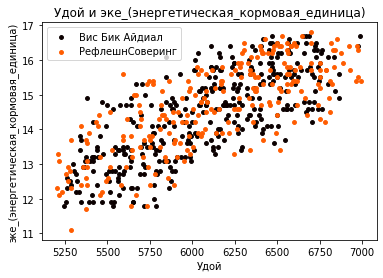

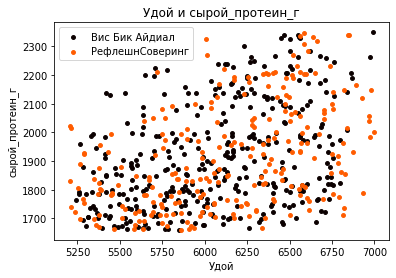

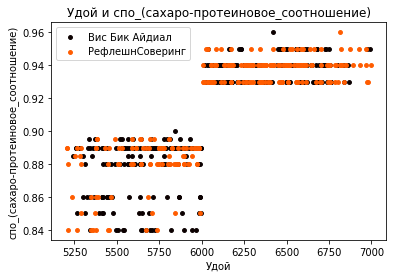

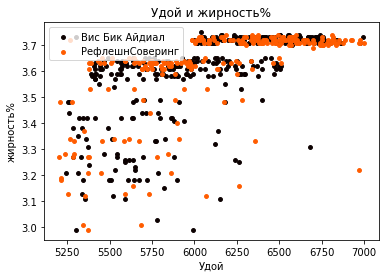

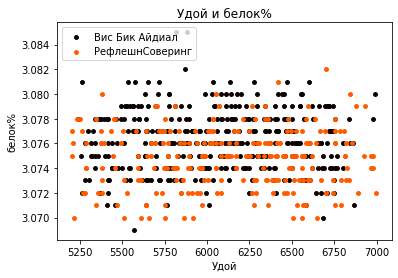

In [31]:
#Scatter of Petal
z1 = ['эке_(энергетическая_кормовая_единица)','сырой_протеин_г','спо_(сахаро-протеиновое_соотношение)','жирность%','белок%']
def scaterplot(b):
    print('категориальный признак - ', b)
    for a in z1:
        a1 = 'Удой и ' + a
        x=main_total['удой_кг']
        y=main_total[a]
        uniq = list(set(main_total[b]))
        z = range(1,len(uniq))
        hot = plt.get_cmap('hot')
        cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
        scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)
        for i in range(len(uniq)):
            indx = main_total[b] == uniq[i]
            plt.scatter(x[indx], y[indx], s=15, color=scalarMap.to_rgba(i), label=uniq[i])
        plt.xlabel('Удой')
        plt.ylabel(a)
        plt.title(a1)
        plt.legend(loc='upper left')
        plt.show()
scaterplot('порода')

Порода коровы ни на что не влияет.

категориальный признак -  тип_пастбища


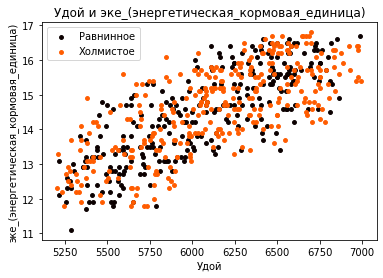

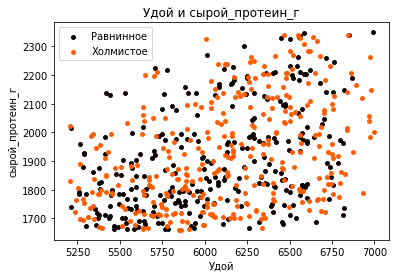

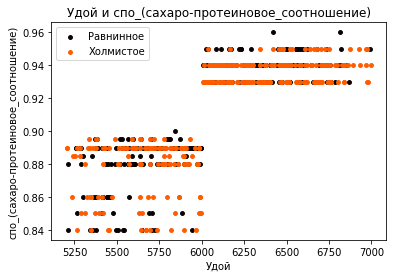

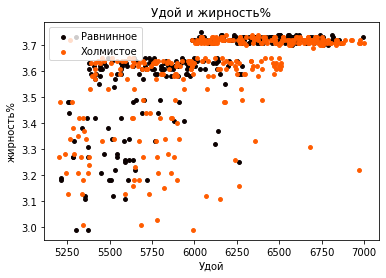

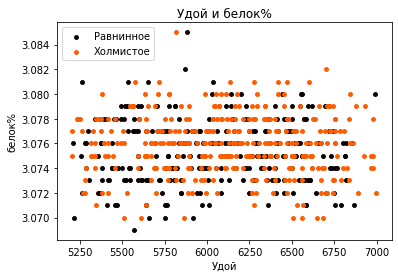

In [32]:
scaterplot('тип_пастбища')

Тип пастбища то же особо ни на что не влияет.

категориальный признак -  порода_папы_быка


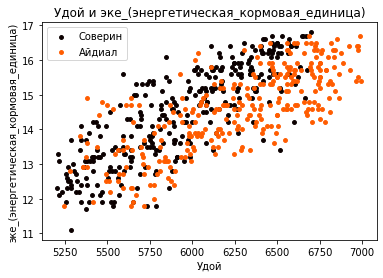

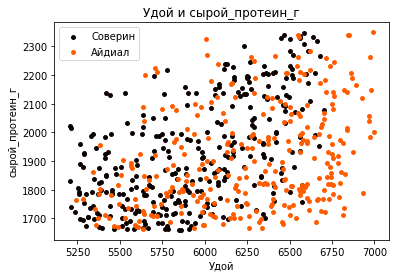

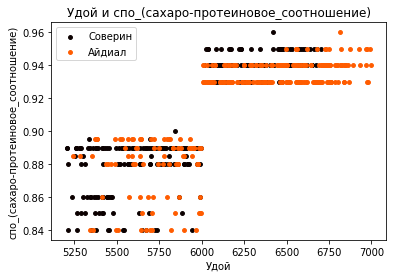

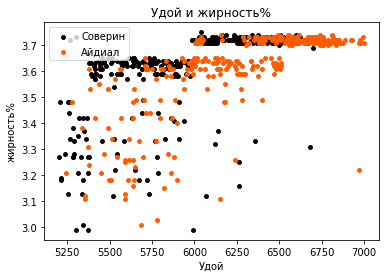

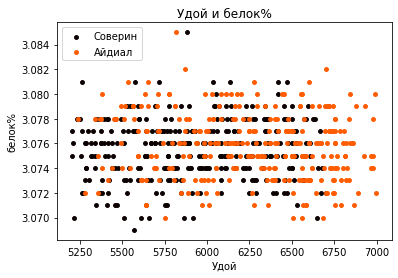

In [33]:
scaterplot('порода_папы_быка')

Порода папы быка же влияет на удой,у коров, чей папа был породы Айдал - стабильно больше удой.

категориальный признак -  вкус_молока


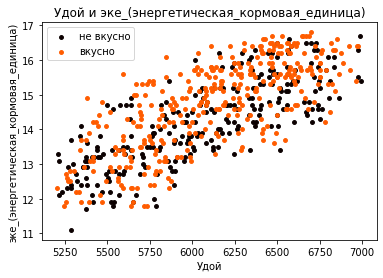

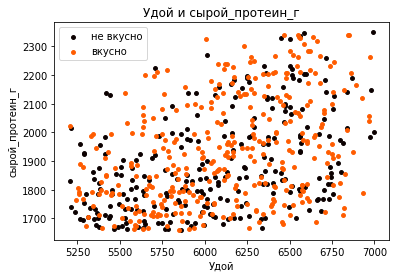

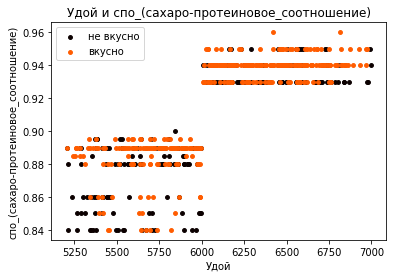

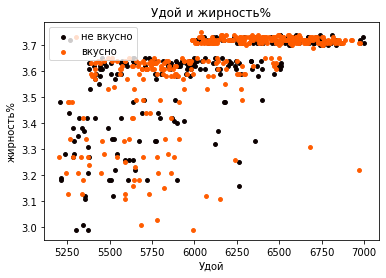

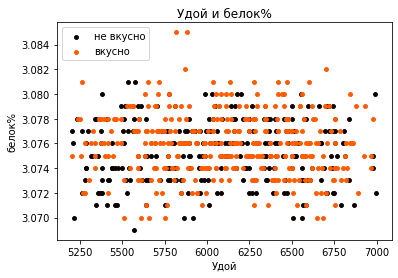

In [34]:
scaterplot('вкус_молока')

Вкус молока тоже не влияет на колличественные признаки.

категориальный признак -  возраст


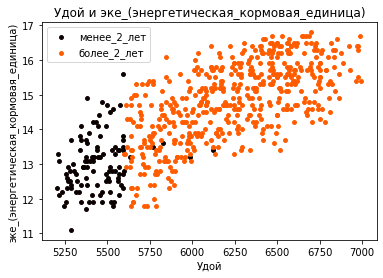

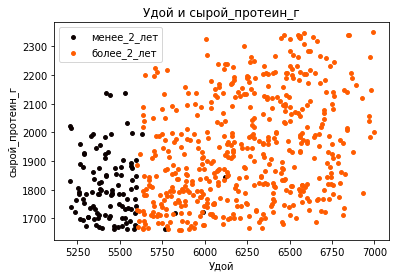

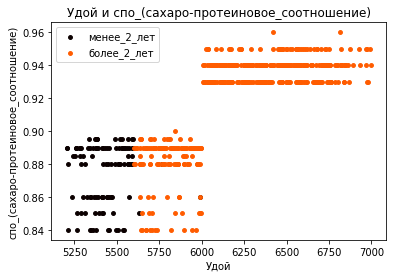

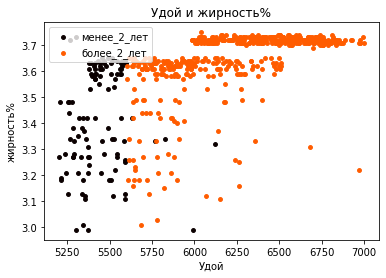

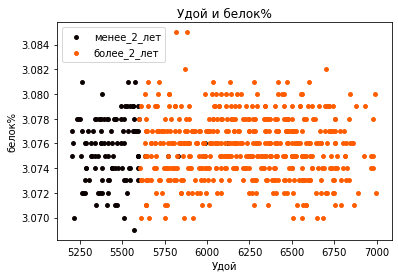

In [35]:
scaterplot('возраст')

А вот возраст влияет - у молодых коров стабильно меньший удой.

Относительно зависиммости признака удой и других колличественных признаков можно сделать такие выводы: 

У удоя и спо прямая линейная связь.

У удоя и протеина тоже линейная но слабая св.

У распределения удоя относительно жирности тоже есть склонность к кластеризации, по сама зависиммость слегка линейная.

У параметров удой и спо нелинейная зависиммость с тенденцией к кластеризации.

У белка и удоя практически нет взаимосвязи.

Породы внутри взаимосвязей распределены примерно равномерно.

##  Шаг 5 Обучение модели линейной регрессии
Теперь когда данные проанализированны можно приступить к обучению моделей линейной регрессии и предсказанию удоя коров.


Целевой признак это удой а входные это все остальные.

### Модель без учёта связи входных данных

In [36]:
categorial = ['тип_пастбища','порода','порода_папы_быка','возраст']
quantity = ['эке_(энергетическая_кормовая_единица)','сырой_протеин_г','спо_(сахаро-протеиновое_соотношение)']
def linear_model(a,q,c):
    RANDOM_STATE = 42
    X = a.drop(['удой_кг','жирность%','белок%','вкус_молока'],axis = 1)
    X = X.drop('id',axis = 1)
    y = a['удой_кг']

    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = RANDOM_STATE)
    encoder = OneHotEncoder(drop='first', sparse=False)
    X_train_ohe = encoder.fit_transform(X_train[c])
    X_test_ohe = encoder.transform(X_test[c])

    encoder_col_names = encoder.get_feature_names()

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[q])
    X_test_scaled = scaler.transform(X_test[q])

    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=q)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=q)

    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    model_lr  = LinearRegression()
    model_lr.fit(X_train, y_train) 
    predictions = model_lr.predict(X_test) 
    r2 = r2_score(y_test, predictions) 
    mae = mean_absolute_error(y_test, predictions) 
    mse = (y_test - predictions)**2/len(y_test)
    mse = mse.sum()
    rmse = mse**0.5
    print('MAE равно', mae)
    print('MSE равно', mse)
    print('RMSE равно', rmse)
    print('Коэф детерминации модели равен', r2)
    
    
    residuals = y_test - predictions
    
    errors = y_test - predictions
    quantiles=(0.025, 0.975)

    lower_quantile = np.quantile(errors, quantiles[0])
    upper_quantile = np.quantile(errors, quantiles[1])

    print(f"Доверительный интервал прогноза: [{lower_quantile}, {upper_quantile}]")
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(x = residuals)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(x = predictions, y = residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()
    return encoder, scaler, model_lr 

In [37]:
main_total['тип_пастбища'] = main_total['тип_пастбища'].str.lower()

MAE равно 155.60458491435642
MSE равно 38598.8451788424
RMSE равно 196.46588807943837
Коэф детерминации модели равен 0.8027248992537603
Доверительный интервал прогноза: [-391.8185600099251, 368.62643257358906]


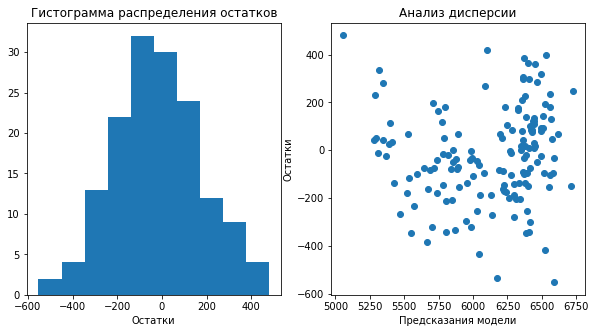

In [38]:
_1st = linear_model(main_total,quantity,categorial)

R2 близок к единице.

Гистограмма распределения остатков смещена влево, это значит что модель чаще чем нужно предсказывает большие значения.
Гистограмма рассеяния дисперсии показывает что её разброс увеличивается при работе с большими значениями.

### Модель с учетом связи входных признаков
Пришло время обучить и протестировать модель линейной регрессии с учетом связи входных признаков.

Для этого изменим из признаки эке и спо ведь у них нелинейная связь с целевым признаком.

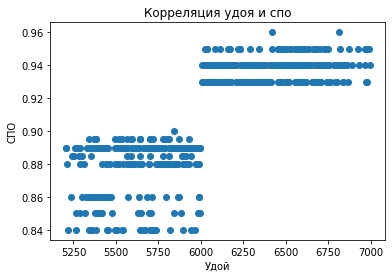

In [39]:
x1=main_total['удой_кг']
y1=main_total['спо_(сахаро-протеиновое_соотношение)']
plt.scatter(x = x1, y = y1)
plt.xlabel('Удой')
plt.ylabel('СПО')
plt.title('Корреляция удоя и спо')
plt.show()

Как видно на гистограмме, удой распределён между двумя кластерами - меньше 0.90 и больше 0.90

Чтобы устранить эту нелинейность, переведём параметр спо в бинарный категориальный признак с двумя категориями больше 0.90 и меньше 90.

In [40]:
def binaring(a):
    if a > 0.90:
        return 1
    else:
        return 0

binar = np.vectorize(binaring)
main_total2 = main_total.copy()
main_total2['спо_(сахаро-протеиновое_соотношение)'] = binar(main_total2['спо_(сахаро-протеиновое_соотношение)'])

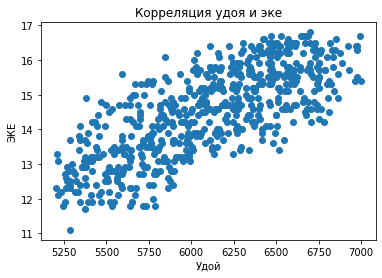

In [41]:
x1=main_total['удой_кг']
y1=main_total['эке_(энергетическая_кормовая_единица)']
plt.scatter(x = x1, y = y1)
plt.xlabel('Удой')
plt.ylabel('ЭКЕ')
plt.title('Корреляция удоя и эке')
plt.show()

Чтобы устранить нелинейность между удоем и скэ добавим новый признак - ЭКЕ в квадрате, то есть возведем столбец эке в квадрат

In [42]:
main_total2['ЭКЕ_в_квадрате'] = main_total2['эке_(энергетическая_кормовая_единица)']**2
main_total2 = main_total2.drop('эке_(энергетическая_кормовая_единица)',axis = 1)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍  Ок 
</div>    


In [43]:
quantity2 = quantity.copy()
quantity2.remove('эке_(энергетическая_кормовая_единица)')
quantity2.remove('спо_(сахаро-протеиновое_соотношение)')
quantity2.append('ЭКЕ_в_квадрате')
categorial2 = categorial.copy()
categorial2.append('спо_(сахаро-протеиновое_соотношение)')

MAE равно 138.98740016296634
MSE равно 31630.317594599703
RMSE равно 177.84914279973268
Коэф детерминации модели равен 0.8383403943512138
Доверительный интервал прогноза: [-355.86739318832645, 326.4805862668595]


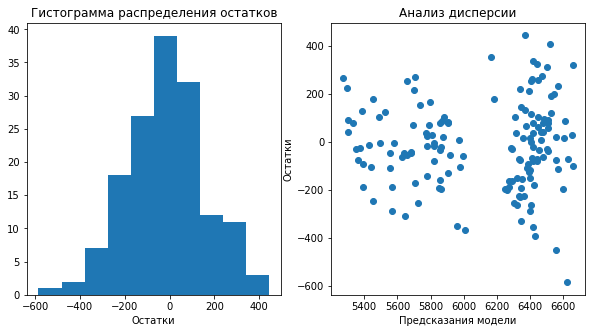

In [44]:
_2nd = linear_model(main_total2,quantity2,categorial2)

Гистограмма остатков снова смещена влево и справа от нуля образовался выброс, разброс дисперсии же осталась примерно такой же.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Здесь можно чуть подробнее проанализировать остатки: видим, что модель чуть завышает предсказания для низкого удоя. Это нам нежелательно, ведь фермер не хочет рисковать и хочет покупать только подходящих коров.
</div>  
        


### Модель с новым признаком имя папы из датасета ferma_dad.csv
Создадим еще одну модель, теперь в изначальные данные добавим столбец имя папы из датасета erma_dad.csv

In [45]:
main_total3 = pd.merge(main_total, names_dad, how='inner') 
categorial3 = categorial.copy()
categorial3.append('Имя Папы')

MAE равно 149.89061797342424
MSE равно 36361.105668475284
RMSE равно 190.68588219497343
Коэф детерминации модели равен 0.8141617773599863
Доверительный интервал прогноза: [-384.6654637022048, 355.90244256653597]


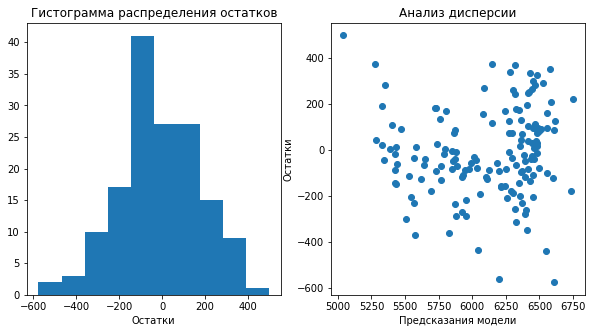

In [46]:
_3rd = linear_model(main_total3,quantity,categorial3)

Коэф детерминации выше чем у модели без учета корреляции входных признаков при этом пик гистограммы остатков смещен влево и разброс дисперсии такой же как до этого.

Сравнив метрики MSE, MAE, RMSE можно сказать что модель с учётом корреляции входных признаков оказалась самой эффективной, при этом её доверительный интервал составляет [-355.86739318832645, 326.4805862668595]

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
`при этом её доверительный интервал составляет 232.56` - как-то не похоже пока на интервал. Важно поправить по доверительному интервалу и уточнить, что именно мы посчитали. Выше подробнее пояснил по этому моменту.

### Прогнозирование на данных о покупаемых коровах 
Запустим лучшую модель на данных о покупаемых коровах
Перед этим нужно добавить в датафрейм недостоющие параметры, в качесвте значений вставим средние значения этих признаков из ferma_main.cvs увеличенное на 5% 

In [47]:
cow_buy

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


In [48]:
cow_buy.columns = ['порода','тип_пастбища','порода_папы_быка','Имя Папы','жирность%','белок%','возраст']
cow_buy1 = cow_buy.copy()
cow_buy1['эке_(энергетическая_кормовая_единица)'] = main_total['эке_(энергетическая_кормовая_единица)'].mean()*1.05
cow_buy1['спо_(сахаро-протеиновое_соотношение)'] = main_total['спо_(сахаро-протеиновое_соотношение)'].mean()*1.05
cow_buy1['сырой_протеин_г'] = main_total['сырой_протеин_г'].mean()*1.05
cow_buy1['ЭКЕ_в_квадрате'] = cow_buy1['эке_(энергетическая_кормовая_единица)'] ** 2
cow_buy1['спо_(сахаро-протеиновое_соотношение)'] = binar(cow_buy1['спо_(сахаро-протеиновое_соотношение)'])
cow_buy1.columns = ['порода','тип_пастбища','порода_папы_быка','Имя Папы','жирность%','белок%','возраст','эке_(энергетическая_кормовая_единица)','спо_(сахаро-протеиновое_соотношение)','сырой_протеин_г','ЭКЕ_в_квадрате']

In [49]:
encoder, scaler, model_lr = _2nd

In [50]:
X1 = cow_buy1
encoder_col_names = encoder.get_feature_names()
X_test_ohe1 = encoder.transform(X1[categorial2])
X_test_scaled1 = scaler.transform(X1[quantity2])
X_test_ohe1 = pd.DataFrame(X_test_ohe1, columns=encoder_col_names)
X_test_scaled1 = pd.DataFrame(X_test_scaled1, columns=quantity2)
X_test1 = pd.concat([X_test_ohe1, X_test_scaled1], axis=1)   
lin_predict = model_lr.predict(X_test1)
print('Предсказанный параметр удой для коров которые собирается купить фермер = \n ', lin_predict)

Предсказанный параметр удой для коров которые собирается купить фермер = 
  [6488.43717478 6057.11901569 6319.24691211 6502.86963388 6489.90894322
 6071.55147478 6488.43717478 6304.81445302 6319.24691211 6255.17419655
 6317.77514367 6319.24691211 6488.43717478 6070.07970635 6319.24691211
 6502.86963388 6317.77514367 6071.55147478 6304.81445302 6489.90894322]


Вот мы и получили предсказания целевого признака удой.
Для всех коров он получился больше 6000.


 <div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
От третьей модели у нас оставалась собственно модель, сохраненная в переменную, скелер и энкодер. То есть, здесь ничего заново обучать не нужно: берем данные, подготавливаем, делаем «трансформ» с помощью скелера и энкодера, а затем «предикт» моделью. 
    
Иначе выходит как если бы мы после каждого запроса к Чатджипити заново обучали всю нейросеть заново. Зачем тратить вычислительные ресурсы? 


<br/>
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"></h2>
Исправлено
</div>


<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Теперь все отлично.
</div>


## Шаг 6 Обучение модели логистической регрессии
Теперь когда первый из интересующих нас признаков предсказан, пришло время обучить модель логистической регрессии и предсказать у каких коров будет вкусное молоко.

Целевой признак это вкус молока а входные это все остальные.

### Обучение модели

In [51]:
quantity.append('жирность%')
quantity.append('белок%')
#quantity.remove('эке_(энергетическая_кормовая_единица)')
#quantity.remove('спо_(сахаро-протеиновое_соотношение)')

Для обучения модели я буду использовать такие-же данные как и для обучения третьей модели линейной регрессии, то есть данные из файла ferma_main с добавленным к ним признаком имя папы.

In [52]:
RANDOM_STATE = 42
X2 = main_total3.drop(['вкус_молока','id','удой_кг'],axis = 1)
y2 = main_total3['вкус_молока']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, random_state = RANDOM_STATE)
encoder2 = OneHotEncoder(drop='first', sparse=False)
X_train_ohe2 = encoder2.fit_transform(X_train2[categorial3])
X_test_ohe2 = encoder2.transform(X_test2[categorial3])

encoder_col_names2 = encoder2.get_feature_names()

scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(X_train2[quantity])
X_test_scaled2 = scaler2.transform(X_test2[quantity])

X_train_ohe2 = pd.DataFrame(X_train_ohe2, columns=encoder_col_names2)
X_test_ohe2 = pd.DataFrame(X_test_ohe2, columns=encoder_col_names2)

X_train_scaled2 = pd.DataFrame(X_train_scaled2, columns=quantity)
X_test_scaled2 = pd.DataFrame(X_test_scaled2, columns=quantity)

X_train2 = pd.concat([X_train_ohe2, X_train_scaled2], axis=1)
X_test2 = pd.concat([X_test_ohe2, X_test_scaled2], axis=1)

clf = LogisticRegression()
clf = clf.fit(X_train2, y_train2)
y_pred2 = clf.predict(X_test2)
score =accuracy_score(y_test2,y_pred2)
print('accuracy: ',round(score ,3))

accuracy:  0.586



 <div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Все ли признаки здесь пригодятся? Как минимум, нужно убедиться, что не берем в таблицу id и удой.


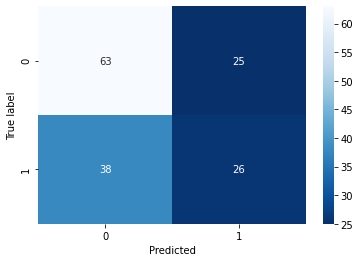

In [53]:
cm = confusion_matrix(y_test2, y_pred2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

In [54]:
recall = recall_score(y_test2, y_pred2, pos_label='вкусно')
precision = precision_score(y_test2,y_pred2,pos_label='вкусно')

print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

recall:  0.716
precision:  0.624


Получившаяся модель верно предсказывает вкус молока в 58% случаем, при этом она чаще совершает ошибки первого рода.
По скольку заказчика интересует вкусное молоко, то нам нужно свети такие случае когда корова с невкусным молоком оказалась в категории вкусного молока к нулю, лучше пусть не будет куплена корова с потенциальным вкусным молоком, чем заказчик купит корову с невкусным.  
По этому нам нужно свести precision к 1 то есть сделать так чтобы модель предсказывала вкусное молоко только при четкой уверенности в этом.

Для этого изменим порог принадлежности к классам.


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Точно. Минимизируем ложноположительные ошибки, максимизируем precision.
</div>    


In [55]:
t = 0.5
while t <= 1:
    t = round( (t + 0.001),6)
    y_pred3 = np.where(clf.predict_proba(X_test2)[:,1] > t, 'вкусно', 'не вкусно')
    precision2 = round(precision_score(y_test2,y_pred3,pos_label='вкусно',zero_division = True),3)
    if precision2 == 1:
        print('precision: ',precision2)
        print('порог: ',t)
        break

precision:  1.0
порог:  0.832


При помомощи цикла я обнаружил подходящее значение порога

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>

Важно явно посчитать порог, чтобы понимать, что мы выбрали наиболее оптимальный.

```
probabilities_one_valid = clf.predict_proba(X_test)[:,1]
    
for i in np.arange(0.5, 0.9, 0.02).round(2):
    y_pred = probabilities_one_valid > i
    print('порог: ', i, 'precision: ', precision_score(y_test, y_pred))
```       

Либо вывести отсортированный список вероятностей, тогда по первой ошибкам увидим, какой порог будет оптимальным.

```

y_proba = model_lr_1.predict_proba(X_test4)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

print(data.head(20)) 

```

Либо сразу автоматически вывести то, что нам нужно:

```

th = 0.5
while True:
    th+=0.001
    pred = (logreg.predict_proba(X_test)[:,1] >= th).astype('bool')
    if precision_score(y_test, pred) == 1:
        break
th

```


При пороге равном 0.832 модель не делает интересующих нас ошибок, но при этом она часто присваивает неправильное негативное значение.

### Предсказание прараметра вкус молока
Теперь запустим модель на данных датасета о покупаемых коровах

In [56]:
cow_buy1['удой_кг'] = lin_predict

Добавляем параметр удоя из наших предсказаний сделанных линейной моделью

In [57]:
X9 = cow_buy1
encoder_col_names3 = encoder2.get_feature_names()
X_test_ohe9 = encoder2.transform(X9[categorial3])
X_test_scaled9 = scaler2.transform(X9[quantity])
X_test_ohe9 = pd.DataFrame(X_test_ohe9, columns=encoder_col_names3)
X_test_scaled9 = pd.DataFrame(X_test_scaled9, columns=quantity)
X_test9 = pd.concat([X_test_ohe9, X_test_scaled9], axis=1)  
y_pred9 = np.where(clf.predict_proba(X_test9)[:,1] > t, 'вкусно', 'не вкусно')
print('Предсказанный параметр вкус молока для коров которые собирается купить фермер = \n ', y_pred9)

Предсказанный параметр вкус молока для коров которые собирается купить фермер = 
  ['не вкусно' 'не вкусно' 'не вкусно' 'не вкусно' 'не вкусно' 'не вкусно'
 'не вкусно' 'не вкусно' 'не вкусно' 'не вкусно' 'не вкусно' 'не вкусно'
 'вкусно' 'не вкусно' 'не вкусно' 'не вкусно' 'не вкусно' 'вкусно'
 'не вкусно' 'не вкусно']


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Всё верно. Здесь предсказываем без дублирования.
 
</div> 


Модель предсказала вкусное молоко у двух коров.

## Итоговые выводы
Параметры предсказаны, теперь можно взлянуть на "полные" данные о покупаемых коровах.

### Выбор коров подходящих под критерии фермера.

In [58]:
cow_buy1['вкус_молока'] = y_pred9
cow_buy1

,порода,тип_пастбища,порода_папы_быка,Имя Папы,жирность%,белок%,возраст,эке_(энергетическая_кормовая_единица),спо_(сахаро-протеиновое_соотношение),сырой_протеин_г,ЭКЕ_в_квадрате,удой_кг,вкус_молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.224481,1,2012.690857,231.784823,6488.437175,не вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.224481,1,2012.690857,231.784823,6057.119016,не вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.224481,1,2012.690857,231.784823,6319.246912,не вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.224481,1,2012.690857,231.784823,6502.869634,не вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.224481,1,2012.690857,231.784823,6489.908943,не вкусно
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.224481,1,2012.690857,231.784823,6071.551475,не вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.224481,1,2012.690857,231.784823,6488.437175,не вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.224481,1,2012.690857,231.784823,6304.814453,не вкусно
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.224481,1,2012.690857,231.784823,6319.246912,не вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.224481,1,2012.690857,231.784823,6255.174197,не вкусно


Отберём коров с удоем больше 6000 кг и вкусным молоком.

In [59]:
cow_buy1.query('(удой_кг > 6000) & (вкус_молока == "вкусно")')

,порода,тип_пастбища,порода_папы_быка,Имя Папы,жирность%,белок%,возраст,эке_(энергетическая_кормовая_единица),спо_(сахаро-протеиновое_соотношение),сырой_протеин_г,ЭКЕ_в_квадрате,удой_кг,вкус_молока
12,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,15.224481,1,2012.690857,231.784823,6488.437175,вкусно
17,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.77,3.053,менее_2_лет,15.224481,1,2012.690857,231.784823,6071.551475,вкусно


Вот именно этих двух коров фермер может приобрести с минимальным риском.

### Общий вывод по моделям машинного обучения.

Для улучшения данных на которых обучалась модель линейной регрессии я применил 2 подхода:

В первом я попытался устранить нелийную корреляцию между целивым признаком удой и признаком эке путём смены типа спо с колличественного на бинарный катигориальный и также избавиться от нелинейной связи параметра удой и параметра эке путём создания нового параметра спо в квадрате. И это дало положительных результатов относительно модели натренерованной на данных без изменения признаков.

Во втором случае я добавил в первоначальные данные новый столбец с именами отцов коров из другого датасета и это улучшило качество модели относительно превой модели но относительно второй она оказалась хуже.

В нашем случае больше важна метрика RMSE или MSE чем MAE, тк в наших данных я убрал выбросы и квадратичные ошибки должны более явно отображать качество работы нашей линейной модели.

Что же касается логистической регрессии нас больше интересует метрика precision так как нас интересует отсутсвие FP предсказаний.

В целом модель логистичкей регрессии получилась низкого качества, скорее всег из-за нехватки входных признаков, если увеличить кол-во входных признаков при этом проверять их вляения на модель и если они будут улучшать ее качество то отсавлять новые признаки. То есть я бы добавил в датасет больше входных признаков на месте заказчик.

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

По заданию проекта здесь важно также дать рекомендации, как можем улучшить качество моделей.

Обрати внимание, у нас модель классификации имеет очень низкое качество. И кажется, нам не хватает входящих признаков для того, чтобы хорошо объяснить таргет. Думаю, нужно это проговорить обязательно в общем выводе.         
</div> 



<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**
    
Спасибо за твой проект! Это была достаточно объемная работа, требующая нахождения в контексте задачи, применения большого объема теоретических знаний.

    
**Отмечу положительные моменты проекта🚀**
    
* Хорошая структура проекта.
* Внимательная предобработка и подготовка признаков.
* Хорошие решения по коду
    
**На что стоит обратить внимание🤔**
    
* Необходимо поправить по оформлению проекта: все импорты нужно перенести в начало и оформить.
* Нужно реализовать корректную загрузку датасетов, некорректную убираем.
* Важно использовать только корректный подход для замера корреляции.
* Нужно уточнить по нелинейным связям признаков с таргетом.
* Нужно перепроверить по признакам для моделей.
* Стоит избегать дублирования обучения на этапе предсказания моделью.
* Важно уточнить по вычислению порога.
* Также важно рассчитать доверительный интервал, полезно посмотреть в интернете, что это такое. Можно посмотреть на бесплатном курсе по АБ-тестированию от Яндекс.Практикума. Более подробно про доверительный интервал будет в одном из ближайших спринтов курса.
* Важно в ряде случаев уточниться по формулировкам. В задаче регрессии не можем говорить, что модель верно оценивает в каком-то проценте случаев. Итд.
* Эти и остальные замечания я также написал по ходу проекта.
    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
    
</div>
 

<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий ко второй проверке**

Спасибо за качественную доработку. Практически все верно. Однако еще кое-что осталось.

Важно поправить по комментарию относительно линейной зависимости признаков. Мы здесь должны смотреть, есть ли линейная зависимость между удоем и другими количественными признаками. Линейно ли связан удой с СПО, с ЭКЕ, с жирностью, с белком и протеином? Бинарные анализировать не нужно. 

**Желаю удачи и жду твой проект на повторное ревью!**😉
</div>


<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий к финальной проверке**

Спасибо за доработку. Критичных комментариев нет. 

Если что-то пропустил или остались вопросы, напиши в телеграм @kriill

Желаю удачи в дальнейшей учебе!

</div>

 